<a href="https://colab.research.google.com/github/ARUNRAJDAARA/ARUNRAJDAARA/blob/main/House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
df.columns.str.lower()

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [8]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [9]:
df.duplicated().sum()

0

In [10]:
df_cols_int = df.select_dtypes(include=['int64'])

In [11]:
df_cols_object= df.select_dtypes(include=['object'])

In [12]:
df.shape

(545, 13)

In [13]:
df_cols_int.shape


(545, 6)

In [14]:
df_cols_object.shape

(545, 7)

In [15]:
df_cols_object.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


In [16]:
df_cols_object.mainroad.value_counts()

,count
mainroad,
yes,468
no,77


In [17]:
for i in df_cols_object.columns:
  print()
  print(df_cols_object[i].value_counts())
  print()


mainroad
yes    468
no      77
Name: count, dtype: int64


guestroom
no     448
yes     97
Name: count, dtype: int64


basement
no     354
yes    191
Name: count, dtype: int64


hotwaterheating
no     520
yes     25
Name: count, dtype: int64


airconditioning
no     373
yes    172
Name: count, dtype: int64


prefarea
no     417
yes    128
Name: count, dtype: int64


furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64



In [18]:
df_cols_object.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [20]:
df_cols_object.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [21]:
col_names = df_cols_object.columns.values

In [22]:
col_names

array(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'], dtype=object)

In [23]:
# Create the ColumnTransformer with OneHotEncoder

preprocessor = ColumnTransformer(

    transformers=[

        ('obj', OneHotEncoder(drop='first', sparse_output=True), col_names)  # Use OneHotEncoder for multiple columns

    ],

    remainder='passthrough'  # Keeps any remaining columns as is

)

# Create a pipeline that includes the preprocessor

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])



# Fit and transform the DataFrame

df_encoded = pipeline.fit_transform(df_cols_object)
# Get the encoded feature names

encoded_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out(col_names)

# Convert the result back to a DataFrame with the new encoded column names

df_encoded = pd.DataFrame(df_encoded, columns=encoded_feature_names)



# # Display the encoded DataFrame

df_encoded.head()

,obj__mainroad_yes,obj__guestroom_yes,obj__basement_yes,obj__hotwaterheating_yes,obj__airconditioning_yes,obj__prefarea_yes,obj__furnishingstatus_semi-furnished,obj__furnishingstatus_unfurnished
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [24]:
df_concat = pd.concat([df_cols_int, df_encoded], axis=1)

In [25]:
df_concat.head()

,price,area,bedrooms,bathrooms,stories,parking,obj__mainroad_yes,obj__guestroom_yes,obj__basement_yes,obj__hotwaterheating_yes,obj__airconditioning_yes,obj__prefarea_yes,obj__furnishingstatus_semi-furnished,obj__furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [26]:
df_concat.shape

(545, 14)

In [27]:
df.shape

(545, 13)

Split the data into x and y

In [29]:
x = df_concat.drop('price', axis=1)
y = df_concat.price

In [30]:
x.head()

,area,bedrooms,bathrooms,stories,parking,obj__mainroad_yes,obj__guestroom_yes,obj__basement_yes,obj__hotwaterheating_yes,obj__airconditioning_yes,obj__prefarea_yes,obj__furnishingstatus_semi-furnished,obj__furnishingstatus_unfurnished
0,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [31]:
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [32]:
print(x.shape)
print(y.shape)

(545, 13)
(545,)


spilt the data into train and test

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 13)
(109, 13)
(436,)
(109,)


**Scaling**

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [36]:
X_train

array([[ 0.38416819,  0.05527092,  1.53917323, ..., -0.55262032,
        -0.870669  , -0.67690027],
       [ 0.9291807 ,  0.05527092,  1.53917323, ..., -0.55262032,
         1.14854209, -0.67690027],
       [-0.60775457, -1.28351359, -0.5579503 , ..., -0.55262032,
        -0.870669  , -0.67690027],
       ...,
       [-0.29709744,  0.05527092,  1.53917323, ..., -0.55262032,
        -0.870669  , -0.67690027],
       [-0.5060189 , -1.28351359, -0.5579503 , ..., -0.55262032,
        -0.870669  ,  1.47732249],
       [ 0.15707965,  0.05527092,  1.53917323, ..., -0.55262032,
         1.14854209, -0.67690027]])

In [37]:
X_train.shape

(436, 13)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from  tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, ReLU, LeakyReLU, PReLU, ELU

**Initilaizing the ANN**

In [42]:
classifier = Sequential()

In [43]:
#  input layer
classifier.add(Dense(units = 13, activation = 'relu'))

In [44]:
classifier.add(Dense(units = 9, activation = 'relu'))

In [45]:
classifier.add(Dense(units = 5, activation = 'relu'))

In [46]:
classifier.add(Dense(units = 3, activation = 'relu'))

In [47]:
classifier.add(Dense(units = 1, activation = 'linear'))

In [48]:
classifier.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
#by default learning rate Adam uses 0.1

In [50]:
#providing our own learning rate value
import tensorflow as tf
own_lr_vale=tf.keras.optimizers.Adam(learning_rate=0.01)


In [ ]:
classifier.compile(optimizer='own_lr_vale', loss='mean_squared_error', metrics=['mse'])

In [51]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000)

Epoch 1/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 25248657309696.0000 - mse: 25248657309696.0000 - val_loss: 26082986164224.0000 - val_mse: 26082986164224.0000
Epoch 2/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25265019289600.0000 - mse: 25265019289600.0000 - val_loss: 26082977775616.0000 - val_mse: 26082977775616.0000
Epoch 3/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25173197586432.0000 - mse: 25173197586432.0000 - val_loss: 26082967289856.0000 - val_mse: 26082967289856.0000
Epoch 4/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24658491473920.0000 - mse: 24658491473920.0000 - val_loss: 26082950512640.0000 - val_mse: 26082952609792.0000
Epoch 5/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25049507561472.0000 - mse: 25049507561472.0000 - val_loss: 26082921152512.0000 - val_mse: 26082921152512.0000
Epoch 6/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24438596698112.0000 - mse: 24438596698112.0000 - val_loss: 26082866626560.0000 - val_mse:

**Early Stoping: **if the model performance is not at all increasing automatically stops the training of the model will stope

In [54]:
Early_stopoing = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [55]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=Early_stopoing)

Epoch 1/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 532059488256.0000 - mse: 532059488256.0000 - val_loss: 1554857328640.0000 - val_mse: 1554857328640.0000
Epoch 2/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 490297556992.0000 - mse: 490297524224.0000 - val_loss: 1553418682368.0000 - val_mse: 1553418682368.0000
Epoch 3/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 615566475264.0000 - mse: 615566475264.0000 - val_loss: 1556097400832.0000 - val_mse: 1556097400832.0000
Epoch 4/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 523661639680.0000 - mse: 523661639680.0000 - val_loss: 1551643967488.0000 - val_mse: 1551643967488.0000
Epoch 5/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 564491649024.0000 - mse: 564491649024.0000 - val_loss: 1558392078336.0000 - val_mse: 1558392078336.0000
Epoch 6/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 533011464192.0000 - mse: 533011464192.0000 - val_loss: 1555780730880.0000 - val_mse: 1555780730880.0000
Epoch 7/1000
30/

In [56]:
model_history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [58]:
import matplotlib.pyplot as plt


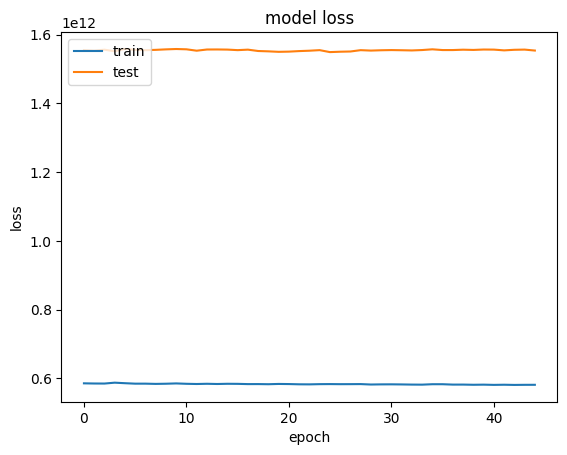

In [64]:
#summary about mse performance
plt.plot(model_history.history['mse'])
plt.plot(model_history.history['val_mse'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

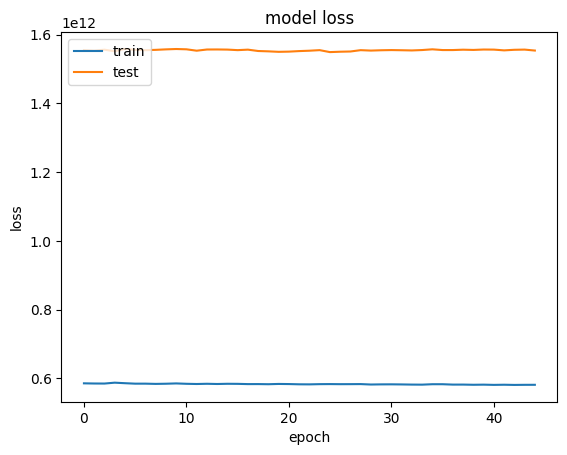

In [65]:
#summerizes history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [66]:
# parrt 3 for -->Making  the predictions and Evaluating the Model

#predicting test set results
y_pred = classifier.predict(X_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [69]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [70]:
mse

1978838796735.641

In [71]:
r2

0.608505035979906

In [72]:
classifier.get_weights()

[array([[ 1.3648312e+00, -1.6858870e+00,  1.3494378e+00, -2.1327319e+00,
          4.5430762e-01,  3.4970860e+00,  1.5402374e+00,  2.0366662e+00,
          7.4463564e-01,  5.4768008e-01,  2.7587530e-01,  2.4221525e+00,
          1.4238815e+00],
        [ 7.6461637e-01, -8.0344677e-01, -2.5428493e+00, -2.3275024e-01,
          8.8934886e-01, -5.4856199e-01,  8.3846998e-01,  1.6161875e+00,
         -1.7354212e+00,  1.6749451e+00,  2.0731359e+00, -8.2847375e-01,
          9.3830621e-01],
        [ 2.5430293e+00,  4.7049470e-02, -8.5766786e-01, -3.4516618e+00,
          2.7399471e+00,  1.2114123e+00,  2.7337065e+00,  3.3039227e+00,
          1.2535348e+00,  3.9618189e+00,  3.7860954e-01,  2.8362541e+00,
          2.9095581e+00],
        [ 3.9161165e+00,  2.9599669e+00, -4.4550910e+00, -1.5024661e+00,
          2.7582209e+00,  2.0534420e+00,  1.6873033e+00, -9.4054383e-01,
          1.5360378e+00,  4.1177363e+00,  1.2029068e+00,  1.0014474e+00,
         -4.3030925e+00],
        [ 4.3015414e